# SUICIDAL AND NON- SUICIDAL TWEETS DETECTION MODEL

## 1. Importing important Libraries

In [1]:
#installing some important libraries
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [3]:
#using VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
#importing pandas, re, nltk-> importing some more important libraries
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Loading the data

In [9]:
#loading the data 
df=pd.read_csv("C:\\Users\\vikra\\Downloads\\archive\\Suicide_Ideation_Dataset(Twitter-based).csv")
df.head(10)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post
8,time for some warsaw beer garden chilling,Not Suicide post
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post


In [11]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


## 3. Pre- Processing the data

In [13]:
#data preprocessing -> dropping null and duplicate columns
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [17]:
#cleaning the data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = " ".join(text)
    return text

In [19]:
stop_words = set(stopwords.words('english'))

In [21]:
# Preprocess tweets
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

In [23]:
#data after pre processing 
df.head(10)

,Tweet,Suicide,Processed_Tweet
0,making some lunch,Not Suicide post,making lunch
1,@Alexia You want his money.,Not Suicide post,alexia want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,dizzyhrvy crap took forever put together iâm g...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,jnaylor kiwitweets hey jer since start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying quotdelicious library 2quot mixed resul...
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post,valenvaldez oh thats good hear already youll c...
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post,mcm180 uve got list fellow hotties gonna share...
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post,jakepaul jamescharles loganpaul shane made ser...
8,time for some warsaw beer garden chilling,Not Suicide post,time warsaw beer garden chilling
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post,hate life lmao hope die soon sumn im tired eve...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 0 to 1786
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            1777 non-null   object
 1   Suicide          1777 non-null   object
 2   Processed_Tweet  1777 non-null   object
dtypes: object(3)
memory usage: 55.5+ KB


## 4. Visualising the data

In [27]:
stop_words = set(stopwords.words('english'))

In [29]:
def get_negative_words(text):
    words = text.split()
    negative_words = [word for word in words if sia.polarity_scores(word)['compound'] < 0]
    return negative_words


In [31]:
df['Negative_Words'] = df['Processed_Tweet'].apply(get_negative_words)
negative_words = [word for sublist in df['Negative_Words'] for word in sublist]

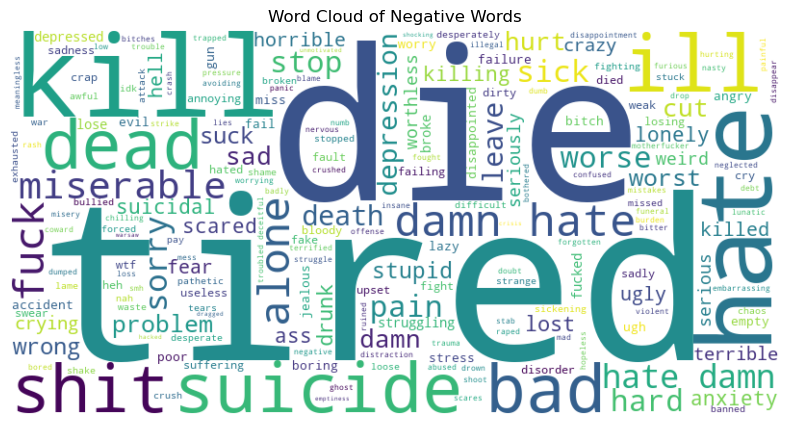

In [33]:
# Generatinng  word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Words')
plt.show()


<Axes: xlabel='Suicide', ylabel='count'>

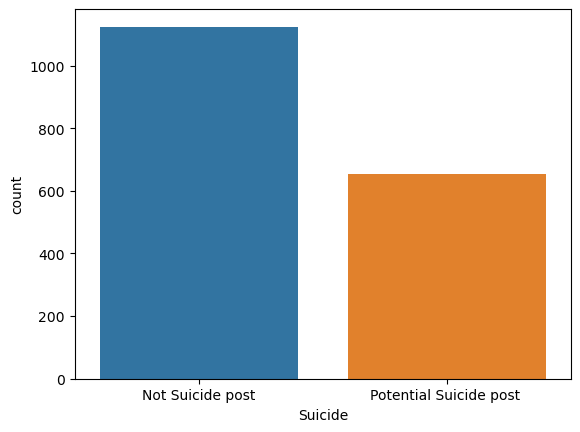

In [35]:
#bar plot of "suicidal" & "non suicidal post"
import seaborn as sns
sns.countplot(x=df['Suicide'],data=df)

In [23]:
#points from data->
#there are more about 600 which are "POTENTIAL SUICIDE POST" and more thann 1000 are "NOT SUICIDE POST".

## 5. Making models to predict the data

### 1. USING VADER SENTIMENT ANALYSIS

In [37]:
def analyze_tweet(tweet):
    sentiment_scores = sia.polarity_scores(tweet)
    return {
        'compound': sentiment_scores['compound'],
        'positive': sentiment_scores['pos'],
        'neutral': sentiment_scores['neu'],
        'negative': sentiment_scores['neg']
    }

df[['compound', 'positive', 'neutral', 'negative']] = df['Tweet'].apply(lambda x: pd.Series(analyze_tweet(x)))

In [39]:
suicide_keywords = ['suicidal', 'hopeless', 'alone', 'end it', 'worthless', 'die']

def detect_suicide(tweet):
    # Check for keywords
    if any(keyword in tweet for keyword in suicide_keywords):
        return 'Potential Suicide post'
    
    # Use sentiment scores as a heuristic
    sentiment = analyze_tweet(tweet)
    if sentiment['negative'] > 0.3 and sentiment['compound'] < -0.5:
        return 'Potential Suicide post'
    
    return 'Not Suicide post'

df['Predicted_Suicide'] = df['Tweet'].apply(detect_suicide)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have your true labels and predictions
true_labels = df['Suicide']
predictions = df['Predicted_Suicide']

print("Accuracy:", accuracy_score(true_labels, predictions))
print("Classification Report:\n", classification_report(true_labels, predictions))


Accuracy: 0.6128306133933596
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.74      0.97      0.84      1124
 Potential Suicide post       0.00      0.00      0.00         0
Potential Suicide post        0.00      0.00      0.00       653

               accuracy                           0.61      1777
              macro avg       0.25      0.32      0.28      1777
           weighted avg       0.47      0.61      0.53      1777



C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [29]:
#using VADER model, we are only getting 61 percent accuracy

### 2. Random Forest classifier 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Suicide'], test_size=0.3, random_state=42)

model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

df['Predicted_Suicide'] = model.predict(df['Tweet'])

Accuracy: 0.9382022471910112
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.93      0.97      0.95       327
Potential Suicide post        0.95      0.88      0.92       207

               accuracy                           0.94       534
              macro avg       0.94      0.93      0.93       534
           weighted avg       0.94      0.94      0.94       534



In [45]:
#using random forest classifier -> we are getting 93 percent accuracy 

In [61]:
df2=model.predict(["i want to do suicide"])
df2

array(['Not Suicide post'], dtype=object)

In [34]:
# But we are not getting correct output, even after changing keywords, feature engeenering -> Overfitting the data

### 3. Logistic Regression Model

In [49]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
y = df['Suicide']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [55]:
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9382022471910112
Classification Report:
                          precision    recall  f1-score   support

       Not Suicide post       0.93      0.97      0.95       211
Potential Suicide post        0.95      0.90      0.92       145

               accuracy                           0.94       356
              macro avg       0.94      0.93      0.94       356
           weighted avg       0.94      0.94      0.94       356



In [39]:
#using logistic regression model, we are 94 percent acccuiracy

In [59]:
#testing the data
test_tweet = ["i want to do suicide"]
test_tweet_vectorized = vectorizer.transform(test_tweet)
prediction = model1.predict(test_tweet_vectorized)
print(f"Model prediction for '{test_tweet[0]}': {prediction}")

Model prediction for 'i want to do suicide': ['Potential Suicide post ']


***From our model, logistic regression model is working very well and prediciting suicidal and non- suicidal posts correctly.***

## 6. Creating small chatbot from this model with the help of Tkinter.

In [63]:
import joblib

# Assuming model1 and vectorizer are already trained
joblib.dump(model1, 'model1.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [77]:
import tkinter as tk
from tkinter import ttk

 

model1 = joblib.load('model1.pkl')  
vectorizer = joblib.load('vectorizer.pkl') 

def classify_text(text):
    text_vectorized = vectorizer.transform([text])
    prediction = model1.predict(text_vectorized)
    return prediction[0]

def get_helpline(risk_level):
    helplines = {
        "Potential Suicide post ": "I'm really sorry you're feeling this way, but I'm not equipped to help. Please reach out to someone who can provide the support you need. It's important to talk to a mental health professional or someone you trust. Please contact the National Suicide Prevention Lifeline at 1800-5990019, or reach out to a local emergency service."
,
        "Not Suicide post": "It's good to talk about your feelings. Talking to a friend, family member, or mental health professional can make a big difference.I hope a nice day for you."
    }
    return helplines.get(risk_level, "Sorry, I couldn't understand that.")
def send_message():
    user_message = entry.get()
    risk_level = classify_text(user_message)
    response = get_helpline(risk_level)
    
    
    text_area.insert(tk.END, f"\n You  : {user_message}\n\n", 'You')
    text_area.insert(tk.END, f"\n🌸 : {response}\n\n", 'Bot')
    
    entry.delete(0, tk.END)


root = tk.Tk()
root.title("HopeBot - Depression Detection Chatbot")
root.geometry("700x500")
root.configure(bg="#dc93f6")

top_frame = tk.Frame(root, bg="#f7ebfd")
top_frame.pack(pady=10)
bottom_frame = tk.Frame(root, bg="#dc93f6")
bottom_frame.pack(pady=10)

text_area_frame = tk.Frame(top_frame, bg="#f7ebfd")
text_area_frame.pack()

text_area = tk.Text(text_area_frame, height=20, width=63, bg="#f7ebfd", fg="#252422", wrap=tk.WORD, font=("Arial", 12), padx=10, pady=10)
text_area.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

scrollbar = ttk.Scrollbar(text_area_frame, command=text_area.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

text_area.config(yscrollcommand=scrollbar.set)
welcome_message = """🌸 : Hello and welcome to HopeBot. I'm here to listen and offer support.Please don't hesitate to share what's on your mind. How can I assist you today?"""
text_area.insert(tk.END, f"{welcome_message}\n\n", 'Bot')

style = ttk.Style()
style.configure("TEntry", padding="5 10 5 10", relief="flat", font=("Roboto", 12))
entry = ttk.Entry(bottom_frame, width=84, style="TEntry")
entry.pack(side=tk.LEFT, padx=10, pady=5)

send_button = ttk.Button(bottom_frame, text="->", command=send_message, style="TButton")
send_button.pack(side=tk.LEFT, padx=10, pady=5)

text_area.tag_configure('You', foreground='#461873', background='#f7ebfd', font=("Arial", 13, "bold"))
text_area.tag_configure('Bot', foreground="#f7ebfd", background='#8c07dd', font=("Arial", 14))

root.mainloop() 


##  ***Thank-You for exploring the project. I hope this chatbot will provide valuable support to those in need. We will definately try to bring more features in it :D***